# 

# !pip install pynput
!pip install pyautogui
!pip install pytesseract
!pip install opencv-python
!pip install keyboard

In [1]:
from image_utils import *
import pytesseract

In [2]:
# 1920x1080
# (2400,0) (4800,1350)

In [3]:
monitor_mode = 'normal'

In [4]:
screenshot = pyautogui.screenshot(region=None, allScreens=True)
if monitor_mode == 'normal':
    game_left_top = image_detection(screenshot, image_path_list=['./image/game_scr.png'], confidence=0.6, merge_thres=50, show=False, location='left_top')
    monitor_scale = 1
    pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
elif monitor_mode == 'wide':
    game_left_top = image_detection(screenshot, image_path_list=['./image/game_scr_wide.png'], confidence=0.7, merge_thres=50, show=False, location='left_top')
    monitor_scale = 1.25
    pytesseract.pytesseract.tesseract_cmd = 'D:/program/Tesseract-OCR/tesseract.exe'

In [5]:
game_region = (game_left_top[0][0], game_left_top[0][1], 1200, 900)
hpmp_cut_region = (1002, 750, 172, 50)
left_coord_cut_region = (999, 850, 75, 23)
right_coord_cut_region = (1082, 850, 75, 23)
game_screen_region = (25,20,765,675)
message_region = (820,565,345,123)
mapname_region = (320,0,170,20)

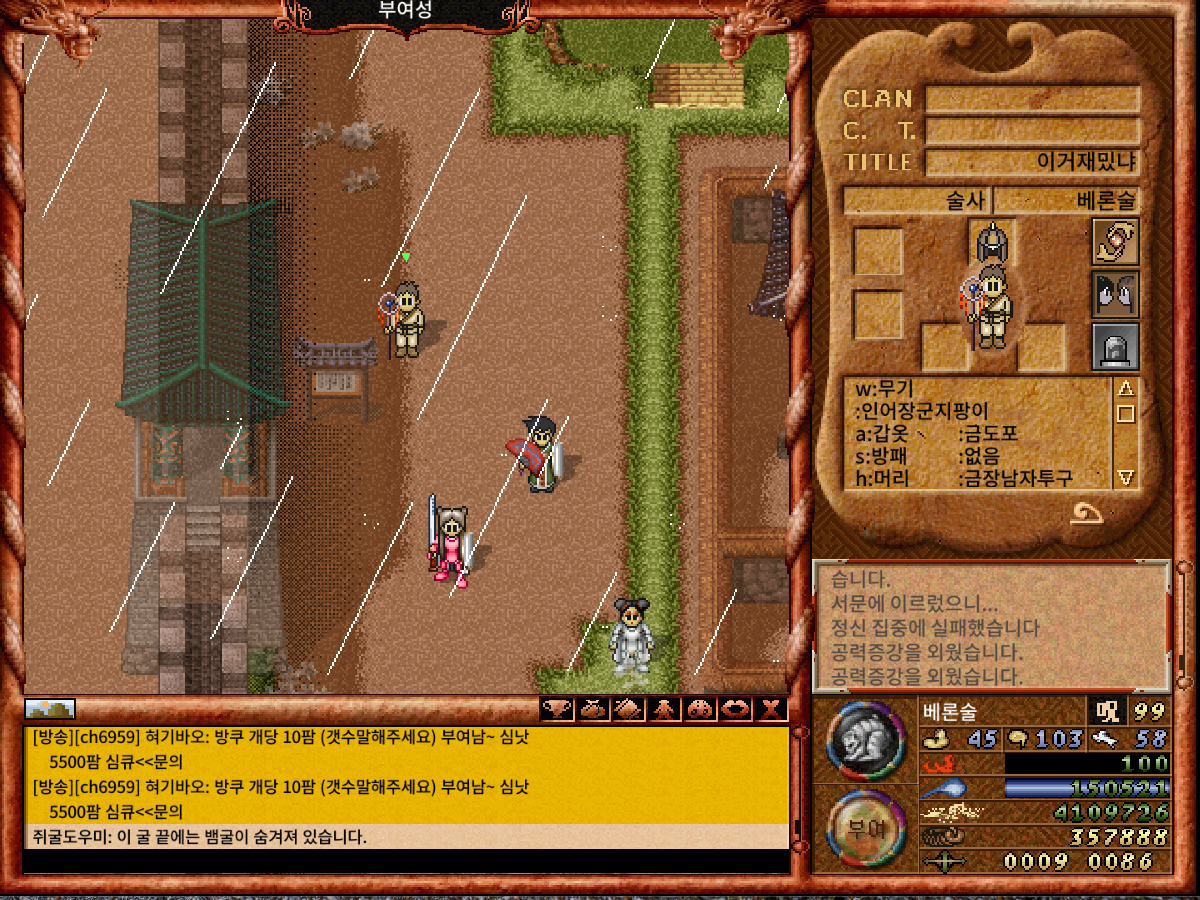

In [7]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
screenshot

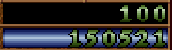

In [8]:
capture_and_crop(screenshot, hpmp_cut_region)

In [9]:
capture_and_crop(screenshot, left_coord_cut_region)

In [10]:
capture_and_crop(screenshot, right_coord_cut_region)

습니다.

. 서 문 에 이 르 렀 으 니 ..,
정 신 . 집 중 에 실 패 했습니다
긍 력 증 강 을 외 웠습니다.

. 공 력 증 강 을 외 웠습니다.



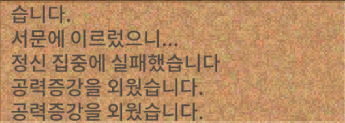

In [11]:
print(extract_text_from_image(capture_and_crop(screenshot, message_region), cut_region=(1), config=r'--oem 1 --psm 6'))
capture_and_crop(screenshot, message_region)

In [12]:
print(extract_text_from_image(capture_and_crop(screenshot, mapname_region), cut_region=(1), config=r'--oem 1 --psm 6').replace(' ',''))
capture_and_crop(screenshot, mapname_region)

부여성



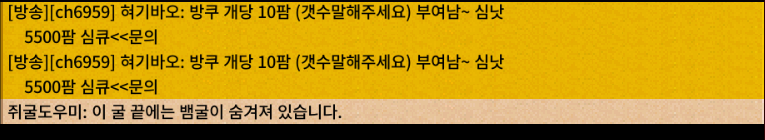

In [13]:
capture_and_crop(screenshot, (25,725, 765, 140))

## HP MP

In [14]:
        mp_thres = 0.4
        hp_thres = 0.4

In [58]:
        # screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
        hpmp_screenshot = capture_and_crop(screenshot, hpmp_cut_region)
        hp_color = np.mean([hpmp_screenshot.getpixel((round((1-x) * hpmp_cut_region[2]),round(hpmp_cut_region[3]/4))) for x in np.arange(hp_thres-0.1, hp_thres, 0.005)])
        mp_color = np.mean([hpmp_screenshot.getpixel((round((1-x) * hpmp_cut_region[2]),round(hpmp_cut_region[3]*3/4))) for x in np.arange(mp_thres-0.1, mp_thres, 0.005)])

In [59]:
def display_color(rgb_color):
    r, g, b = rgb_color
    print(f"\033[48;2;{r};{g};{b}m      \033[0m RGB: {rgb_color}")

In [60]:
        mp_thres = 0.3
        hp_thres = 0.3

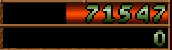

In [101]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
hpmp_screenshot = capture_and_crop(screenshot, hpmp_cut_region)
hpmp_screenshot

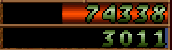

In [102]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
hpmp_screenshot2 = capture_and_crop(screenshot, hpmp_cut_region)
hpmp_screenshot2

In [106]:
mp_color_low_list = [hpmp_screenshot.getpixel((round((1-x) * hpmp_cut_region[2]),round(hpmp_cut_region[3]*3/4))) for x in np.arange(0.01, 0.05, 0.001)]
for color in mp_color_low_list:
    display_color(color)

       RGB: (44, 2, 4)
       RGB: (44, 2, 4)
       RGB: (44, 2, 4)
       RGB: (44, 2, 4)
       RGB: (44, 2, 4)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (119, 155, 91)
       RGB: (119, 155, 91)
       RGB: (119, 155, 91)
       RGB: (119, 155, 91)
       RGB: (119, 155, 91)
       RGB: (119, 155, 91)


In [107]:
mp_color_low_list = [(r,g,b) for (r,g,b) in mp_color_low_list if ((b > r + 20) and (b > r+20) and (b > 100))]
for color in mp_color_low_list:
    display_color(color)

In [108]:
mp_color_low_list = [hpmp_screenshot2.getpixel((round((1-x) * hpmp_cut_region[2]),round(hpmp_cut_region[3]*3/4))) for x in np.arange(0.01, 0.05, 0.001)]
for color in mp_color_low_list:
    display_color(color)

       RGB: (44, 2, 4)
       RGB: (44, 2, 4)
       RGB: (44, 2, 4)
       RGB: (44, 2, 4)
       RGB: (44, 2, 4)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (152, 104, 63)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (60, 76, 129)
       RGB: (60, 76, 129)
       RGB: (60, 76, 129)
       RGB: (60, 76, 129)
       RGB: (60, 76, 129)
       RGB: (60, 76, 129)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RGB: (0, 0, 0)
       RG

In [109]:
mp_color_low_list = [(r,g,b) for (r,g,b) in mp_color_low_list if ((b > r + 20) and (b > r+20) and (b > 100))]
for color in mp_color_low_list:

       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (60, 76, 129)
       RGB: (60, 76, 129)
       RGB: (60, 76, 129)
       RGB: (60, 76, 129)
       RGB: (60, 76, 129)
       RGB: (60, 76, 129)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)
       RGB: (59, 75, 128)


## 왕퀘 테스트

In [11]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
guard = image_detection(screenshot, image_path_list=['./image/guard.png'], confidence=0.6, merge_thres=50, show=True, location='center')[0]
guard

(403, 279)

In [12]:
kingq_region_cut = (guard[0]+40, guard[1]-40, 380, 300)

In [181]:
king_coord = image_detection(screenshot, ['./image/king.png'], 0.6, show=False)

In [183]:
king_coord

[(542, 122)]

In [15]:
# 첫 번째 좌표로 마우스 이동
target_x = game_region[0] + round(king_coord[0][0])
target_y = game_region[1] + round(king_coord[0][1])

NameError: name 'king_coord' is not defined

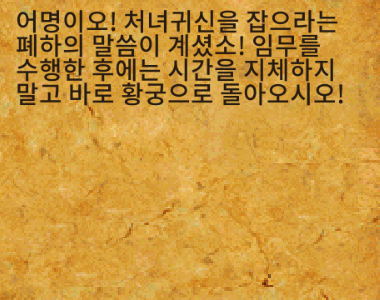

'어명이오!처녀귀신을잡으라는\n폐하의말씀이계셨소!임무를\n수행한후에는시간을지체하지\n말고바로황궁으로돌아오시오!\n'

In [17]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

In [7]:
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

"고.둘각|\n\n'29031`\n\n'!\n|,받겠습니다.\n무서워서안되겠어요.\n"

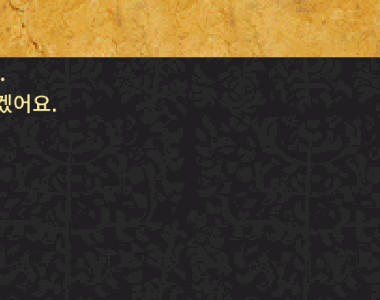

'어요.\n'

In [41]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

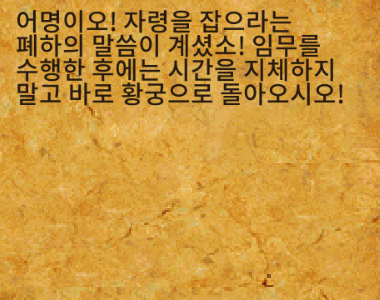

'어명이오!자령을잡으라는\n\n폐하의말씀이계셨소!임무를\n수행한후에는시간을지체하지\n말고바로황궁으로돌아오시오!\n'

In [42]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

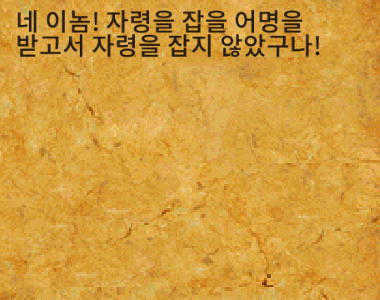

'네이놈!자령을잡을어명을\n받고서자령을잡지않았구나!\n`\n'

In [43]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

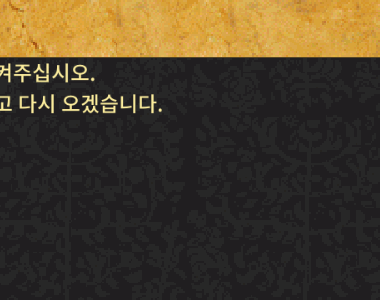

'주십시오.\n]다시오겠습니다.\n'

In [44]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

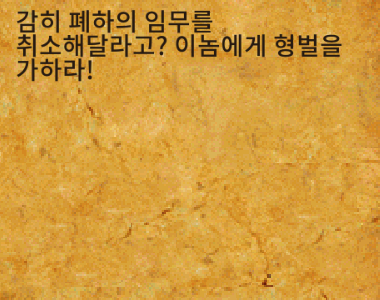

'감히폐하의임무를:\n취소해달라고?이놈에게형벌을\n가하라!\n\n`\n'

In [45]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

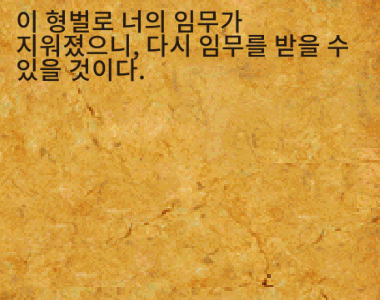

'이형벌로너의임무가:\n지워졌으니,다시임무를받을수\n있을것이다.\n\n`\n'

In [46]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
cac = capture_and_crop(screenshot, kingq_region_cut)
display(cac)
extracted_text = extract_text_from_image(game_region, cut_region=kingq_region_cut, config=r'--oem 1 --psm 6')
extracted_text.replace(' ','')

In [46]:
['무례', '폐하께', '어요', '명', 'target', '다시', '취소', '형벌']

'네이놈!처녀귀신을.잡을어명을\n받고서처녀귀신을잡지\n않았구나!\n'

## 자동이동 테스트

In [45]:
import time
import random
from pynput import keyboard, mouse
from datetime import datetime

In [ ]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)

In [37]:
(cur_x, cur_y, mapname) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region, mapname_cut_region=mapname_region)
(cur_x, cur_y, mapname) 

(73, 8, '부여성북쪽')

In [222]:
coordinate_type = 'y'
target_coordinate = [22,25]
boundary_coordinate =  [74]
avoid_list = []
in_mapname = '부여성북쪽'
move_only=False
exact_move=False
mi_att=True

move_start_time = time.time()
move_time_limit = 99999999

mouse_controller = mouse.Controller()
keyboard_controller = keyboard.Controller()

In [224]:
    def target_move(cur_x, cur_y, mapname, coordinate_type, target_coordinate, boundary_coordinate=None, avoid_list=[], in_mapname='all', move_only=False, exact_move=False, mi_att=True):
        # while state['move_pause']:
        #     time.sleep(0.1)
        # if not state['auto_move']:
        #     raise
        if not move_only:
            screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
            if (in_mapname!='all'):
                (cur_x,cur_y,mapname) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region, mapname_cut_region=mapname_region)
            else:
                (cur_x,cur_y) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region)
            print(f'[{datetime.now()}]target_move:{mapname}, target:{coordinate_type}={target_coordinate}, bounday:{boundary_coordinate}, cur_x:{cur_x}, cur_y:{cur_y}')
        mi = 0
        ti = 0
        if coordinate_type == 'x':
            cur = cur_x
            boundary_type = 'y'
        elif coordinate_type == 'y':
            cur = cur_y
            boundary_type = 'x'
        delay = random.uniform(0.3, 0.4)
        move_dir = keyboard.Key.right
        rmove_dir = keyboard.Key.left
        if type(target_coordinate) != list:
            target_coordinate = [target_coordinate]
        if type(in_mapname) != list:
            in_mapname = [in_mapname]

        while (cur < np.min(target_coordinate) or cur > np.max(target_coordinate)) and (time.time() - move_start_time <= move_time_limit) and ((mapname in in_mapname) or ('all' in in_mapname)):
            # while state['move_pause']:
            #     time.sleep(0.1)
            # if not state['auto_move']:
            #     raise
            
            if cur < np.min(target_coordinate):
                if coordinate_type == 'x':
                    move_dir = keyboard.Key.right
                    rmove_dir = keyboard.Key.left
                elif coordinate_type == 'y':
                    move_dir = keyboard.Key.down
                    rmove_dir = keyboard.Key.up
            elif cur > np.max(target_coordinate):
                if coordinate_type == 'x':
                    move_dir = keyboard.Key.left
                    rmove_dir = keyboard.Key.right
                elif coordinate_type == 'y':
                    move_dir = keyboard.Key.up
                    rmove_dir = keyboard.Key.down
                    
            if (boundary_coordinate is not None) and (bcur < np.min(boundary_coordinate) or bcur > np.max(boundary_coordinate)):
                print(f'[{datetime.now()}] [OOB] mi : {mi}, target_move:{mapname}, target:{coordinate_type}={target_coordinate}, bounday:{boundary_coordinate}, cur_x:{cur_x}, cur_y:{cur_y}, x:{x}, y:{y}')
                b_avoid_list = [[rmove_dir], [move_dir], [rmove_dir, rmove_dir], [move_dir]]
                (cur_x, cur_y, mapname) = target_move(cur_x=cur_x, cur_y=cur_y, mapname=mapname, coordinate_type=boundary_type, target_coordinate=boundary_coordinate, avoid_list=b_avoid_list, in_mapname=in_mapname, move_only=True, exact_move=True, mi_att=False)
            
            keyboard_controller.press(move_dir)
            if exact_move:
                keyboard_controller.release(move_dir)
                time.sleep(0.1)
            elif ti < 2:
                keyboard_controller.release(move_dir)
                
            screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
            if in_mapname!='all':
                (x,y,mapname) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region, mapname_cut_region=mapname_region)
            else:
                (x,y) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region)

            if (cur_x != x or cur_y != y):
                mi = 0
            mi += 1  
            ti += 1
            stuck_time = datetime.now()
            print(f'[{stuck_time}] mi : {mi}, target_move:{mapname}, target:{coordinate_type}={target_coordinate}, bounday:{boundary_coordinate}, cur_x:{cur_x}, cur_y:{cur_y}, x:{x}, y:{y}')
            if (mi >= 3) and (move_only):
                break
                
            if mi >= 10:
                print(f"avoid:{avoid_list}")
            while (mi >= 10) and ((coordinate_type == 'x' and cur_x == x) or (coordinate_type == 'y' and cur_y == y)) and (time.time() - move_start_time <= move_time_limit) and ((mapname in in_mapname) or ('all' in in_mapname)):
                # while state['move_pause']:
                #     time.sleep(0.1)
                # if not state['auto_move']:
                #     raise
                print(f'[{stuck_time}] [AVD] mi : {mi}, target_move:{mapname}, target:{coordinate_type}={target_coordinate}, bounday:{boundary_coordinate}, cur_x:{cur_x}, cur_y:{cur_y}, x:{x}, y:{y}')
                keyboard_controller.release(move_dir)
                keyboard_controller.press('o')
                keyboard_controller.release('o')
                time.sleep(delay)
                if mi_att:
                    keyboard_controller.press('6')
                    keyboard_controller.release('6')
                time.sleep(delay)
                keyboard_controller.press(move_dir)
                keyboard_controller.release(move_dir)
                if len(avoid_list) == 0:
                    screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
                    if in_mapname!='all':
                        (x,y,mapname) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region, mapname_cut_region=mapname_region)
                    else:
                        (x,y) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region)
                    if ((coordinate_type == 'x' and cur_x != x) or (coordinate_type == 'y' and cur_y != y)):
                        mi = 0
                for avoid_key_list in avoid_list:
                    # 방향전환 포함 2회
                    for avoid_key in avoid_key_list:
                        for _ in range(2):
                            # while state['move_pause']:
                            #     time.sleep(0.1)
                            # if not state['auto_move']:
                            #     raise
                            keyboard_controller.release(move_dir)
                            keyboard_controller.press(avoid_key)
                            keyboard_controller.release(avoid_key)
                            time.sleep(delay)
                    for _ in range(2):
                        keyboard_controller.press(move_dir)
                        keyboard_controller.release(move_dir)
                        time.sleep(delay)
                    screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
                    if in_mapname!='all':
                        (x,y,mapname) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region, mapname_cut_region=mapname_region)
                    else:
                        (x,y) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region)
                    mi += 1
                    if ((coordinate_type == 'x' and cur_x != x) or (coordinate_type == 'y' and cur_y != y)):
                        mi = 0
                        break
            
            cur_x = x
            cur_y = y
            if coordinate_type == 'x':
                cur = cur_x
                bcur = cur_y
            elif coordinate_type == 'y':
                cur = cur_y
                bcur = cur_x

        keyboard_controller.release(move_dir)
        return (cur_x, cur_y, mapname)

In [227]:
        # while state['move_pause']:
        #     time.sleep(0.1)
        # if not state['auto_move']:
        #     raise
        if not move_only:
            screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
            if (in_mapname!='all'):
                (cur_x,cur_y,mapname) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region, mapname_cut_region=mapname_region)
            else:
                (cur_x,cur_y) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region)
            print(f'[{datetime.now()}]target_move:{mapname}, target:{coordinate_type}={target_coordinate}, bounday:{boundary_coordinate}, cur_x:{cur_x}, cur_y:{cur_y}')
            mi = 0
        ti=0
        if coordinate_type == 'x':
            cur = cur_x
            boundary_type = 'y'
            bcur = cur_y
        elif coordinate_type == 'y':
            cur = cur_y
            boundary_type = 'x'
            bcur = cur_x
        delay = random.uniform(0.3, 0.4)
        move_dir = keyboard.Key.right
        rmove_dir = keyboard.Key.left
        if type(target_coordinate) != list:
            target_coordinate = [target_coordinate]
        if type(in_mapname) != list:
            in_mapname = [in_mapname]

[2025-06-03 01:33:42.516427]target_move:부여성북쪽, target:y=[22, 25], bounday:[74], cur_x:74, cur_y:15


In [229]:
        time.sleep(3)

        while (cur < np.min(target_coordinate) or cur > np.max(target_coordinate)) and (time.time() - move_start_time <= move_time_limit) and ((mapname in in_mapname) or ('all' in in_mapname)):
            # while state['move_pause']:
            #     time.sleep(0.1)
            # if not state['auto_move']:
            #     raise
            
            if cur < np.min(target_coordinate):
                if coordinate_type == 'x':
                    move_dir = keyboard.Key.right
                    rmove_dir = keyboard.Key.left
                elif coordinate_type == 'y':
                    move_dir = keyboard.Key.down
                    rmove_dir = keyboard.Key.up
            elif cur > np.max(target_coordinate):
                if coordinate_type == 'x':
                    move_dir = keyboard.Key.left
                    rmove_dir = keyboard.Key.right
                elif coordinate_type == 'y':
                    move_dir = keyboard.Key.up
                    rmove_dir = keyboard.Key.down

            if (boundary_coordinate is not None) and (bcur < np.min(boundary_coordinate) or bcur > np.max(boundary_coordinate)):
                keyboard_controller.release(move_dir)
                print(f'[{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}] [OOB] mi : {mi}, target_move:{mapname}, target:{coordinate_type}={target_coordinate}, bounday:{boundary_coordinate}, cur_x:{cur_x}, cur_y:{cur_y}, x:{x}, y:{y}')
                (cur_x, cur_y, mapname) = target_move(cur_x=cur_x, cur_y=cur_y, mapname=mapname, coordinate_type=boundary_type, target_coordinate=boundary_coordinate, avoid_list=[], in_mapname=in_mapname, move_only=True, exact_move=True, mi_att=False)
                
            keyboard_controller.press(move_dir)
            if exact_move:
                keyboard_controller.release(move_dir)
                time.sleep(0.1)
            elif ti < 2:
                keyboard_controller.release(move_dir)
                
            screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
            if in_mapname!='all':
                (x,y,mapname) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region, mapname_cut_region=mapname_region)
            else:
                (x,y) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region)

            if (cur_x != x or cur_y != y):
                mi = 0
            mi += 1  
            ti += 1
            stuck_time = datetime.now()
            print(f'[{stuck_time}] mi : {mi}, target_move:{mapname}, target:{coordinate_type}={target_coordinate}, bounday:{boundary_coordinate}, cur_x:{cur_x}, cur_y:{cur_y}, x:{x}, y:{y}')
                
            if mi >= 10:
                print(f"avoid:{avoid_list}")
            while (mi >= 10) and ((coordinate_type == 'x' and cur_x == x) or (coordinate_type == 'y' and cur_y == y)) and (time.time() - move_start_time <= move_time_limit) and ((mapname in in_mapname) or ('all' in in_mapname)):
                # while state['move_pause']:
                #     time.sleep(0.1)
                # if not state['auto_move']:
                #     raise
                print(f'[{stuck_time}] [AVD] mi : {mi}, target_move:{mapname}, target:{coordinate_type}={target_coordinate}, bounday:{boundary_coordinate}, cur_x:{cur_x}, cur_y:{cur_y}, x:{x}, y:{y}')
                keyboard_controller.release(move_dir)
                keyboard_controller.press('o')
                keyboard_controller.release('o')
                time.sleep(delay)
                if mi_att:
                    keyboard_controller.press('6')
                    keyboard_controller.release('6')
                time.sleep(delay)
                keyboard_controller.press(move_dir)
                keyboard_controller.release(move_dir)
                if len(avoid_list) == 0:
                    screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
                    if in_mapname!='all':
                        (x,y,mapname) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region, mapname_cut_region=mapname_region)
                    else:
                        (x,y) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region)
                    if ((coordinate_type == 'x' and cur_x != x) or (coordinate_type == 'y' and cur_y != y)):
                        mi = 0
                for avoid_key_list in avoid_list:
                    # 방향전환 포함 2회
                    for avoid_key in avoid_key_list:
                        print(avoid_key)
                        for _ in range(2):
                            # while state['move_pause']:
                            #     time.sleep(0.1)
                            # if not state['auto_move']:
                            #     raise
                            keyboard_controller.release(move_dir)
                            keyboard_controller.press(avoid_key)
                            keyboard_controller.release(avoid_key)
                            time.sleep(delay)
                    for _ in range(2):
                        keyboard_controller.press(move_dir)
                        keyboard_controller.release(move_dir)
                        time.sleep(delay)
                    screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
                    if in_mapname!='all':
                        (x,y,mapname) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region, mapname_cut_region=mapname_region)
                    else:
                        (x,y) = get_current_coordinate(screenshot, left_coord_cut_region, right_coord_cut_region)
                    mi += 1
                    if ((coordinate_type == 'x' and cur_x != x) or (coordinate_type == 'y' and cur_y != y)):
                        mi = 0
                        break
            
            cur_x = x
            cur_y = y
            if coordinate_type == 'x':
                cur = cur_x
                bcur = cur_y
            elif coordinate_type == 'y':
                cur = cur_y
                bcur = cur_x

        keyboard_controller.release(move_dir)

[2025-06-03 01:33:47.226284] mi : 1, target_move:부여성북쪽, target:y=[22, 25], bounday:[74], cur_x:74, cur_y:15, x:74, y:15
[2025-06-03 01:33:47.569863] mi : 1, target_move:부여성북쪽, target:y=[22, 25], bounday:[74], cur_x:74, cur_y:15, x:74, y:16
[2025-06-03 01:33:47.924398] mi : 1, target_move:부여성북쪽, target:y=[22, 25], bounday:[74], cur_x:74, cur_y:16, x:74, y:17
[2025-06-03 01:33:48.254744] mi : 1, target_move:부여성북쪽, target:y=[22, 25], bounday:[74], cur_x:74, cur_y:17, x:74, y:18
[2025-06-03 01:33:48.609380] mi : 1, target_move:부여성북쪽, target:y=[22, 25], bounday:[74], cur_x:74, cur_y:18, x:74, y:19
[2025-06-03 01:33:48.952591] mi : 1, target_move:부여성북쪽, target:y=[22, 25], bounday:[74], cur_x:74, cur_y:19, x:74, y:20
[2025-06-03 01:33:49.275768] mi : 2, target_move:부여성북쪽, target:y=[22, 25], bounday:[74], cur_x:74, cur_y:20, x:74, y:20
[2025-06-03 01:33:49.628673] mi : 3, target_move:부여성북쪽, target:y=[22, 25], bounday:[74], cur_x:74, cur_y:20, x:74, y:20
[2025-06-03 01:33:49.952616] mi : 4, tar

In [ ]:
time.sleep(0.5)
keyboard_controller.press("'")
keyboard_controller.release("'")
time.sleep(delay)
for txt in '살려주세요':
    keyboard_controller.press(txt)
    keyboard_controller.release(txt)
    time.sleep(delay)
keyboard_controller.press(keyboard.Key.enter)
keyboard_controller.release(keyboard.Key.enter)
time.sleep(delay)

In [ ]:
    def target_move(self, cur_x, cur_y, mapname, coordinate_type, target_coordinate, avoid_list, in_mapname='all', every_rel=False):
        while self.state['move_pause']:
            time.sleep(0.1)
        if not self.state['auto_move']:
            raise
        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
        if in_mapname!='all':
            (cur_x,cur_y,mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
        else:
            (cur_x,cur_y) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region)
        print(f'[{datetime.now()}]target_move:{mapname}, {coordinate_type}, {target_coordinate}, cur_x:{cur_x}, cur_y:{cur_y}')
        if coordinate_type == 'x':
            cur = cur_x
        elif coordinate_type == 'y':
            cur = cur_y
        self.mi = 0
        delay = random.uniform(0.3, 0.4)
        move_dir = keyboard.Key.right
        if type(target_coordinate) != list:
            target_coordinate = [target_coordinate]
        if type(in_mapname) != list:
            in_mapname = [in_mapname]
        
        while (cur < np.min(target_coordinate) or cur > np.max(target_coordinate)) and (time.time() - self.move_start_time <= self.move_time_limit) and ((mapname in in_mapname) or ('all' in in_mapname)):
            while self.state['move_pause']:
                time.sleep(0.1)
            if not self.state['auto_move']:
                raise
            if cur < np.min(target_coordinate):
                if coordinate_type == 'x':
                    move_dir = keyboard.Key.right
                elif coordinate_type == 'y':
                    move_dir = keyboard.Key.down
            elif cur > np.max(target_coordinate):
                if coordinate_type == 'x':
                    move_dir = keyboard.Key.left
                elif coordinate_type == 'y':
                    move_dir = keyboard.Key.up
            self.keyboard_controller.press(move_dir)
            if every_rel:
                self.keyboard_controller.release(move_dir)
                time.sleep(0.1)
            screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
            if in_mapname!='all':
                (x,y,mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
            else:
                (x,y) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region)

            if cur_x != x or cur_y != y:
                self.mi = 0
            self.mi += 1
            
            print(f"mi : {self.mi}, cur_x:{cur_x}, cur_y:{cur_y}, x:{x}, y:{y}")
            if self.mi >=3:
                print(f"avoid:{avoid_list}")
            while (self.mi >= 3) and ((coordinate_type == 'x' and cur_x == x) or (coordinate_type == 'y' and cur_y == y)) and (time.time() - self.move_start_time <= self.move_time_limit) and ((mapname in in_mapname) or ('all' in in_mapname)):
                while self.state['move_pause']:
                    time.sleep(0.1)
                if not self.state['auto_move']:
                    raise
                print(f"avoid - mi : {self.mi}, cur_x:{cur_x}, cur_y:{cur_y}, x:{x}, y:{y}")
                if len(avoid_list) == 0:
                    self.keyboard_controller.press(move_dir)
                    screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                    if in_mapname!='all':
                        (x,y,mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
                    else:
                        (x,y) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region)
                    self.mi += 1
                    if ((coordinate_type == 'x' and cur_x != x) or (coordinate_type == 'y' and cur_y != y)):
                        self.mi = 0
                        break
                    if self.mi >= 9:
                        self.keyboard_controller.press('o')
                        self.keyboard_controller.release('o')
                        self.keyboard_controller.press('6')
                        self.keyboard_controller.release('6')
                        for _ in range(2):
                            self.keyboard_controller.release(move_dir)
                            self.keyboard_controller.press(move_dir)
                            self.keyboard_controller.release(move_dir)
                            time.sleep(delay)
                for avoid_key_list in avoid_list:
                    # 방향전환 포함 2회
                    for avoid_key in avoid_key_list:
                        for _ in range(2):
                            while self.state['move_pause']:
                                time.sleep(0.1)
                            if not self.state['auto_move']:
                                raise
                            self.keyboard_controller.release(move_dir)
                            self.keyboard_controller.press(avoid_key)
                            self.keyboard_controller.release(avoid_key)
                            time.sleep(delay)
                    for _ in range(2):
                        self.keyboard_controller.press(move_dir)
                        time.sleep(delay)
                    screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                    if in_mapname!='all':
                        (x,y,mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
                    else:
                        (x,y) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region)
                    self.mi += 1
                    if ((coordinate_type == 'x' and cur_x != x) or (coordinate_type == 'y' and cur_y != y)):
                        self.mi = 0
                        break
                    if self.mi >= 9:
                        self.keyboard_controller.press('o')
                        self.keyboard_controller.release('o')
            cur_x = x
            cur_y = y

            if coordinate_type == 'x':
                cur = cur_x
            elif coordinate_type == 'y':
                cur = cur_y

        self.keyboard_controller.release(move_dir)
        
        return (cur_x, cur_y, mapname)

## 자동사냥 테스트

In [317]:
screenshot = pyautogui.screenshot(region=game_region, allScreens=True)
game_screen = capture_and_crop(screenshot, game_screen_region)

In [318]:
me = image_detection(game_screen, image_path_list=['./image/me_back.png', './image/me_left.png', './image/me_right.png', './image/me_front.png'], confidence=0.6, merge_thres=45, show=True, location='bottom') 

In [303]:
cn = image_detection(game_screen, image_path_list=['./image/cn_back.png', './image/cn_left.png', './image/cn_right.png', './image/cn_front.png'], confidence=0.7, merge_thres=45, show=True, location='bottom')

In [66]:
# 공격가능범위
# 가로 9칸 세로 8칸

In [ ]:
                    # nearest_x, nearest_y = (0, 0)
                    # dist = 10000
                    # for x,y in avail_cn:
                    #     n_dist = abs(me[0][0] - x) + abs(me[0][1] - y)
                    #     if n_dist < dist:
                    #         dist = n_dist
                    #         nearest_x, nearest_y = (x, y)
                    # target_x = self.game_region[0] + self.game_screen_region[0] + nearest_x
                    # target_y = self.game_region[1] + self.game_screen_region[1] + nearest_y
                    # if not self.state['macro_running'] or not self.state['macro_type']==macro_type:
                    #     print('macro stop')
                    #     raise
                    # self.active_spell_auto(skill_name='tab', macro_type=macro_type, target_iter=[1], active_iter=1, change_dir=False, auto_bomu=False, auto_mabi=False, mouse_target=(target_x, target_y))
                    # time.sleep(0.1)
                    # extracted_text = extract_text_from_image(self.game_region, cut_region=self.message_region, config=r'--oem 1 --psm 6')
                    # extracted_text = extracted_text.replace(' ','')
                    # print(extracted_text)
                    # if '처녀' in extracted_text:
                    #     # self.active_spell_auto(skill_name='curse', macro_type=macro_type, target_iter=[1], active_iter=1, change_dir=False, auto_bomu=False, auto_mabi=False, direction='stay')
                    #     self.active_spell_auto(skill_name='hellfire', macro_type=macro_type, target_iter=[1], active_iter=1, change_dir=False, auto_bomu=False, auto_mabi=False, direction='stay')
                    #     time.sleep(5)

In [ ]:
    def auto_move(self):
        delay = random.uniform(0.25, 0.35)
        auto_g = 0
        while self.state['auto_move']:
            self.move_start_time = time.time()
            self.move_time_limit = 0
            if self.state['auto_gongj_heal'] == 'ON':
                self.start_auto_gongj_heal()
                auto_g = 1
            screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
            (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
            print(f'map:{mapname}')
            print(f'move start:{self.state['move_type']}')
            while time.time() - self.move_start_time > self.move_time_limit:
                self.move_start_time = time.time()
                if self.state['move_type'] == 'out_palace':
                    # 왕궁 나기기
                    self.move_time_limit = 30
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=38, avoid_list=[], in_mapname='부여성왕궁내부')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[12,17], avoid_list=[[keyboard.Key.up]], in_mapname='부여성왕궁내부')
                    
                    while (mapname=='부여성왕궁내부') and (time.time() - self.move_start_time <= self.move_time_limit):
                        if not self.state['auto_move']:
                            raise
                        self.keyboard_controller.press(keyboard.Key.down)
                        self.keyboard_controller.release(keyboard.Key.down)
                        time.sleep(delay)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[54,60], avoid_list=[], in_mapname=['부여성왕궁내부', '부여성'])
    
                elif self.state['move_type'] == 'go_palace':
                    # 왕궁 복귀
                    self.move_time_limit = 120
                    while (mapname in ['부여성', '부여성북쪽', '부여성동쪽', '부여성왕궁내부']) and ((cur_y > 20) or (cur_y < 10) or (cur_x < 70) or (cur_x > 80)) and (time.time() - self.move_start_time <= self.move_time_limit):
                        if not self.state['auto_move']:
                            raise
                        self._active_skill('north')
                        time.sleep(0.5)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[73,75], avoid_list=[[keyboard.Key.up], [keyboard.Key.up, keyboard.Key.up]], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[19,21], avoid_list=[], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[73,75], avoid_list=[[keyboard.Key.up], [keyboard.Key.up, keyboard.Key.up]], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[40,42], avoid_list=[[keyboard.Key.right], [keyboard.Key.right, keyboard.Key.right], [keyboard.Key.up, keyboard.Key.right]], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=42, avoid_list=[[keyboard.Key.left], [keyboard.Key.left, keyboard.Key.left]], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=58, avoid_list=[[keyboard.Key.up], [keyboard.Key.up, keyboard.Key.up]], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=60, avoid_list=[[keyboard.Key.left], [keyboard.Key.left, keyboard.Key.left]], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[72,74], avoid_list=[[keyboard.Key.down], [keyboard.Key.down, keyboard.Key.down]], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[54,56], avoid_list=[], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[72,74], avoid_list=[[keyboard.Key.up], [keyboard.Key.down]], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=53, avoid_list=[], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    while (mapname in ['부여성', '부여성북쪽', '부여성동쪽']) and (time.time() - self.move_start_time <= self.move_time_limit):
                        if not self.state['auto_move']:
                            raise
                        self.keyboard_controller.press(keyboard.Key.up)
                        self.keyboard_controller.release(keyboard.Key.up)
                        time.sleep(delay)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[10,12], avoid_list=[], in_mapname='부여성왕궁내부')
    
                elif self.state['move_type'] == 'go_haunted_house':
                    # 흉가 이동
                    self.move_time_limit = 60
                    while ((cur_x < 70) or (cur_x > 80) or (cur_y < 140) or (cur_y > 150)) and (time.time() - self.move_start_time <= self.move_time_limit):
                        if not self.state['auto_move']:
                            raise
                        self._active_skill('south')
                        time.sleep(0.5)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[145,147], avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=68, avoid_list=[[keyboard.Key.up], [keyboard.Key.up, keyboard.Key.up]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=143, avoid_list=[[keyboard.Key.right], [keyboard.Key.right, keyboard.Key.right]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=68, avoid_list=[[keyboard.Key.down], [keyboard.Key.down, keyboard.Key.down]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=126, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[68,70], avoid_list=[[keyboard.Key.down]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=123, avoid_list=[[keyboard.Key.right]])
    
                elif self.state['move_type'] == 'go_west_buyeo':
                    # 동부여 이동
                    self.move_time_limit = 30
                    while (mapname in ['부여성', '부여성북쪽', '부여성동쪽', '부여성왕궁내부']) and ((cur_y > 95) or (cur_y < 80) or (cur_x > 10)) and (time.time() - self.move_start_time <= self.move_time_limit):     
                        if not self.state['auto_move']:
                            raise
                        self._active_skill('west')
                        time.sleep(0.5)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[88,92], avoid_list=[[keyboard.Key.right], [keyboard.Key.right], [keyboard.Key.up, keyboard.Key.right], [keyboard.Key.left]], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=2, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[87,88], avoid_list=[[keyboard.Key.right], [keyboard.Key.left]], in_mapname=['부여성', '부여성북쪽', '부여성동쪽'])
                    while (mapname in ['부여성', '부여성북쪽', '부여성동쪽']) and (time.time() - self.move_start_time <= self.move_time_limit):
                        if not self.state['auto_move']:
                            raise
                        self.keyboard_controller.press(keyboard.Key.left)
                        self.keyboard_controller.release(keyboard.Key.left)
                        time.sleep(delay)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=26, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]], in_mapname='동부여통로')

                elif self.state['move_type'] == 'go_west_haunted':
                    # 동부여 흉가 이동
                    self.move_time_limit = 35
                    while ('동부여' in mapname) and ((cur_x < 70) or (cur_x > 80) or (cur_y < 140) or (cur_y > 150)) and (time.time() - self.move_start_time <= self.move_time_limit):
                        if not self.state['auto_move']:
                            raise
                        self._active_skill('south')
                        time.sleep(0.5)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
    
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[143,145], avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]], in_mapname='동부여성')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[69,70], avoid_list=[], in_mapname='동부여성')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[69,70], avoid_list=[], in_mapname='동부여성')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[122,123], avoid_list=[], in_mapname='동부여성')
                    
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[133,135], avoid_list=[], in_mapname='동부여성')
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[68,70], avoid_list=[], in_mapname='동부여성')
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[132], avoid_list=[[keyboard.Key.right], [keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]], in_mapname='동부여성')
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[68,70], avoid_list=[[keyboard.Key.down]], in_mapname='동부여성')
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[124,126], avoid_list=[], in_mapname='동부여성')
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[68,70], avoid_list=[[keyboard.Key.down]], in_mapname='동부여성')
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[122,123], avoid_list=[[keyboard.Key.right]], in_mapname='동부여성')
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[69,70], avoid_list=[[keyboard.Key.down]], in_mapname='동부여성')
                    # ## 흉가입구 입장
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=122, avoid_list=[[keyboard.Key.right], [keyboard.Key.left]], in_mapname='동부여성')
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[69,70], avoid_list=[[keyboard.Key.down], [keyboard.Key.down, keyboard.Key.down]], in_mapname='동부여성')
                    while (mapname=='동부여성') and (time.time() - self.move_start_time <= self.move_time_limit):
                        if not self.state['auto_move']:
                            raise
                        self.keyboard_controller.press(keyboard.Key.up)
                        self.keyboard_controller.release(keyboard.Key.up)
                        time.sleep(delay)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[11,12], avoid_list=[], in_mapname='동부여융가입구')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[11,12], avoid_list=[], in_mapname='동부여융가입구')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[6,7], avoid_list=[], in_mapname='동부여융가입구')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[6,7], avoid_list=[], in_mapname='동부여융가입구')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[4,5], avoid_list=[], in_mapname='동부여융가입구')
                    
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=13, avoid_list=[[keyboard.Key.right], [keyboard.Key.left, keyboard.Key.left]], in_mapname='동부여융가입구')
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[5,6], avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]], in_mapname='동부여융가입구')
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[4,5], avoid_list=[], in_mapname='동부여융가입구') 
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[6,7], avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]], in_mapname='동부여융가입구') # 2지 앞
    
                elif self.state['move_type'] == 'in_haunted_house':
                    # 흉가 1층 이동
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[69,70], avoid_list=[[keyboard.Key.down], [keyboard.Key.down, keyboard.Key.down]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=122, avoid_list=[[keyboard.Key.right], [keyboard.Key.left]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[69,70], avoid_list=[[keyboard.Key.down], [keyboard.Key.down, keyboard.Key.down]])
                    while cur_x > 5:
                        if not self.state['auto_move']:
                            raise
                        self.keyboard_controller.press(keyboard.Key.up)
                        self.keyboard_controller.release(keyboard.Key.up)
                        time.sleep(delay)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=2)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=8)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=1)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=6)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=11)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=3)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=29)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=25)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=30)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=28)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=6)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=18)
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=18)
    
                elif self.state['move_type'] == 'in_west_haunted':
                    # 2지 동부여 흉가 1층 이동
                    self.move_time_limit = 9999
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[6,7], avoid_list=[[keyboard.Key.down], [keyboard.Key.down, keyboard.Key.down]], in_mapname='동부여융가입구')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=3, avoid_list=[[keyboard.Key.left], [keyboard.Key.right]], in_mapname='동부여융가입구')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[6,7], avoid_list=[[keyboard.Key.down], [keyboard.Key.down, keyboard.Key.down]], in_mapname='동부여융가입구')
                    while (mapname=='동부여융가입구'):
                        if not self.state['auto_move']:
                            raise
                        self.keyboard_controller.press(keyboard.Key.up)
                        self.keyboard_controller.release(keyboard.Key.up)
                        time.sleep(delay)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
                    # 1층 안에서 이동
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=[7,8], avoid_list=[], in_mapname='제2동부여용가1')
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=8, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                    # (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=8, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=5, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=11, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=3, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=20, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=4, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=29, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]])
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=9, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                    while True:
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=29, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=17, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=29, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=25, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=25, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=28, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=4, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=20, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=6, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=18, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=16, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=12, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=29, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]])
                        (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=17, avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]])
    
                elif self.state['move_type'] == 'go_buyeo':
                    # 부여 이동
                    self.move_time_limit = 60
                    while ('동부여' in mapname) and ((cur_x < 130) or (cur_x > 140) or (cur_y > 90) or (cur_y < 80)) and (time.time() - self.move_start_time <= self.move_time_limit) :      
                        if not self.state['auto_move']:
                            raise
                        self._active_skill('east')
                        time.sleep(0.5)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
                        
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[86,90], avoid_list=[[keyboard.Key.left], [keyboard.Key.right, keyboard.Key.right]], in_mapname='동부여성')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=140, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]], in_mapname='동부여성')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[87,88], avoid_list=[[keyboard.Key.right], [keyboard.Key.left]], in_mapname='동부여성')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=144, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]], in_mapname='동부여성')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[87,88], avoid_list=[[keyboard.Key.right], [keyboard.Key.left]], in_mapname='동부여성')
                    while (mapname=='동부여성') and (time.time() - self.move_start_time <= self.move_time_limit):
                        if not self.state['auto_move']:
                            raise
                        self.keyboard_controller.press(keyboard.Key.right)
                        self.keyboard_controller.release(keyboard.Key.right)
                        time.sleep(delay)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)
    
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=25, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]], in_mapname='동부여통로')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[14,15], avoid_list=[[keyboard.Key.right], [keyboard.Key.left]], in_mapname='동부여통로')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='x', target_coordinate=28, avoid_list=[[keyboard.Key.up], [keyboard.Key.down, keyboard.Key.down]], in_mapname='동부여통로')
                    (cur_x, cur_y, mapname) = self.target_move(cur_x, cur_y, mapname, coordinate_type='y', target_coordinate=[14,15], avoid_list=[[keyboard.Key.right], [keyboard.Key.left]], in_mapname='동부여통로')
                    
                    while (mapname=='동부여통로') and (time.time() - self.move_start_time <= self.move_time_limit):
                        if not self.state['auto_move']:
                            raise
                        self.keyboard_controller.press(keyboard.Key.right)
                        self.keyboard_controller.release(keyboard.Key.right)
                        time.sleep(delay)
                        screenshot = pyautogui.screenshot(region=self.game_region, allScreens=True)
                        (cur_x, cur_y, mapname) = get_current_coordinate(screenshot, self.left_coord_cut_region, self.right_coord_cut_region, mapname_cut_region=self.mapname_region)

In [ ]:

def extract_coor():
    global modified_image1, modified_image2
    # 전처리된 이미지
    preprocessed_image = preprocess_image(modified_image1, scale=5)

    # OCR을 사용하여 텍스트 추출
    extracted_text1 = pytesseract.image_to_string(preprocessed_image, lang='kor', config=config)
    
    # 전처리된 이미지
    preprocessed_image = preprocess_image(modified_image2, scale=5)

    # OCR을 사용하여 텍스트 추출
    extracted_text2 = pytesseract.image_to_string(preprocessed_image, lang='kor', config=config)
    # print(f"현재 좌표: ({extracted_text1}, {extracted_text2})")
    label.config(text=f"현재 좌표: ({extracted_text1}, {extracted_text2})")
    label.after(100, extract_coor)  # 100ms마다 좌표 업데이트

# Tkinter GUI 설정
root = tk.Tk()
root.title("캐릭터 좌표 확인")

# 현재 마우스 위치 얻기
mouse_x, mouse_y = pyautogui.position()

# Tkinter 창의 위치 설정
# "+x+y" 형식으로 좌표 지정
root.geometry(f"300x240+{mouse_x}+{mouse_y}")

label = tk.Label(root, text="현재 좌표: (0, 0)", font=("Arial", 10))
label.pack(pady=20)

modified_image1 = find_coord(region, cut_start=(802,682), cut_end=(858,700))
modified_image2 = find_coord(region, cut_start=(865,682), cut_end=(930,700))

# 좌표 업데이트 함수 호출
extract_coor()

root.mainloop()